In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
mktcap = pd.read_pickle("ryu_new_mktcap6_1.pickle")
price = pd.read_pickle("ryu_new_price6.pickle")
vol = pd.read_pickle("ryu_new_volume6.pickle")

weight = mktcap.apply(lambda x: x/ np.nansum(x), axis=1)
rtn = price.pct_change(fill_method=None) * np.sign(price)

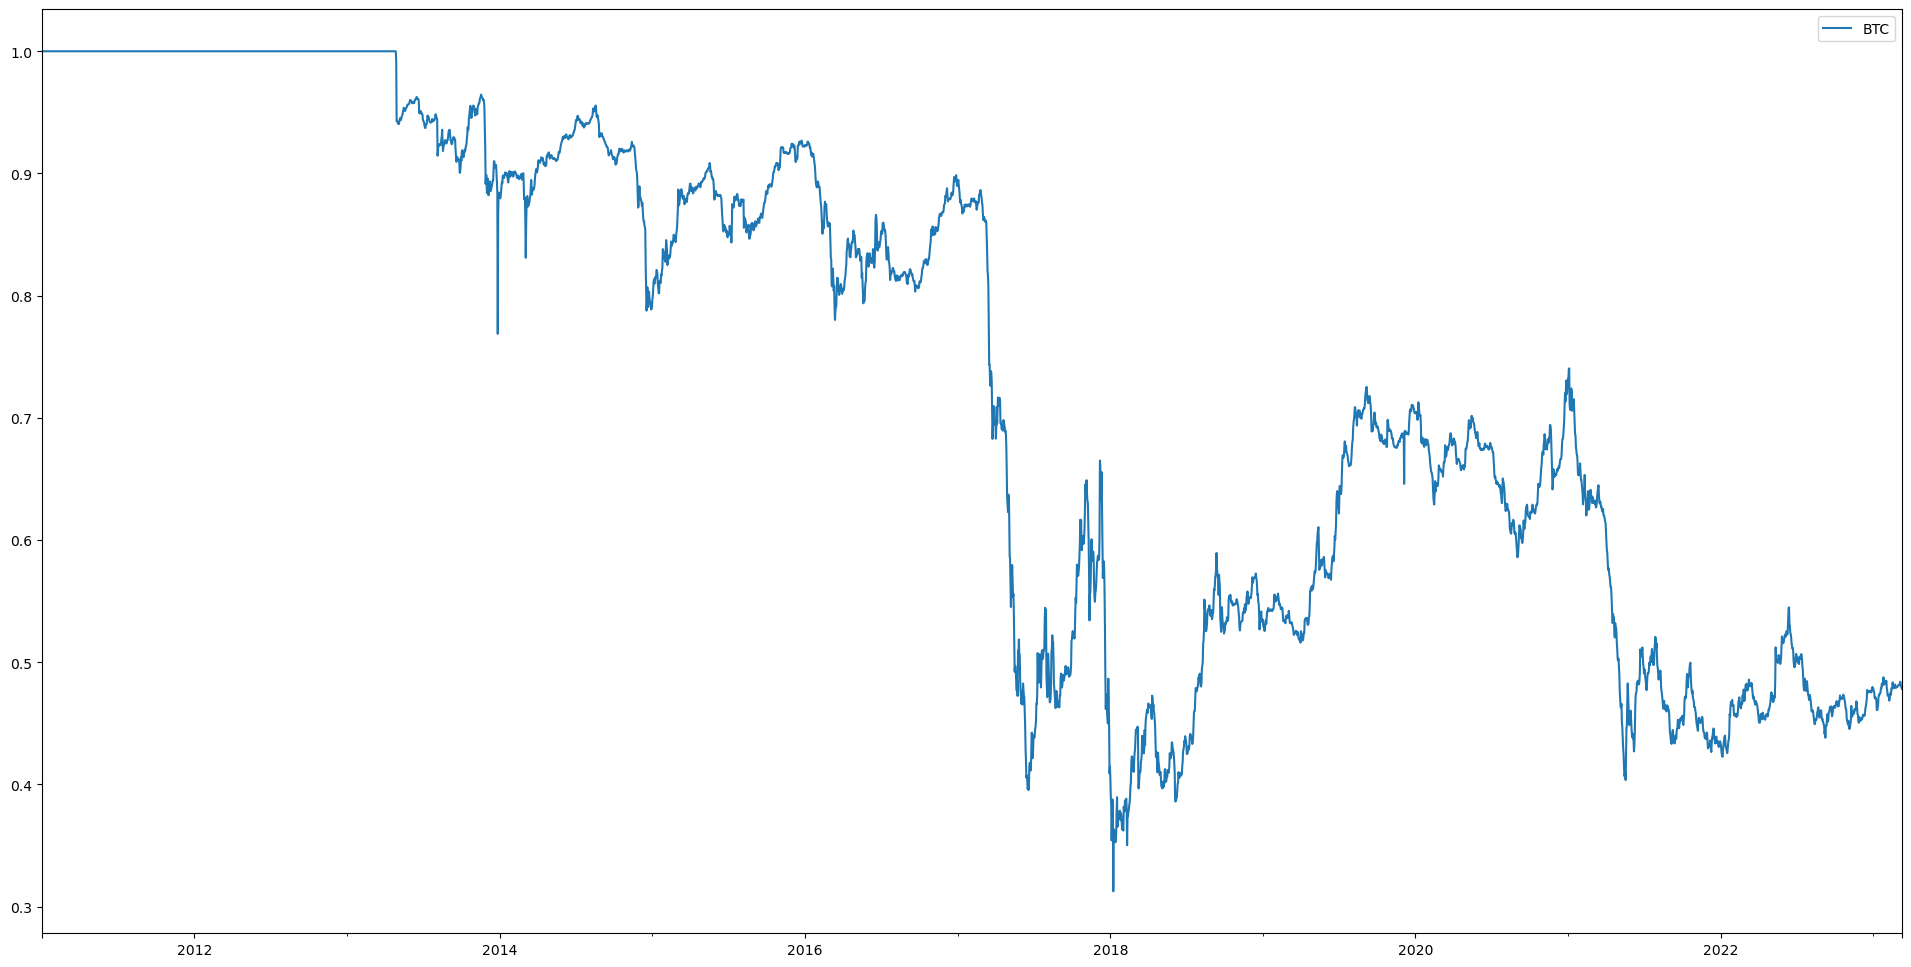

In [5]:
weight[["BTC"]].plot(figsize=(24,12));

1) 다시한번 effect_of _shares 코인 3개 드랍 (PAC, PROC, SNOV)

In [12]:
raw_market = pd.read_pickle('ryu_new_mktcap6_1.pickle')
raw_price = pd.read_pickle('ryu_new_price6.pickle')
raw_vol = pd.read_pickle("ryu_new_volume6.pickle")

In [13]:
masked_mktcap = raw_market[raw_market>1_000_000]
masked_price = raw_price[raw_market>1_000_000] 

effect_of_shares = masked_mktcap / (masked_mktcap.shift(1)*(1+masked_price.pct_change(fill_method=None)))
effect_of_shares = effect_of_shares -1

problems = []
for i,val in enumerate(effect_of_shares.sum()):
    if np.abs(val) > 1000:
        problems.append(effect_of_shares.columns[i])
    elif val < -0.9:
        problems.append(effect_of_shares.columns[i])
print(len(problems))

3


In [14]:
problems

['PAC', 'PROC', 'SNOV']

In [15]:
clean_mktcap = raw_market.drop(problems, axis=1)
clean_price = raw_price.drop(problems, axis=1)
clean_vol = raw_vol.drop(problems, axis=1)

In [16]:
clean_mktcap_moving_average = clean_mktcap.rolling(20, min_periods=1).mean()
clean_mktcap = clean_mktcap[clean_mktcap_moving_average>1_000_000]

In [19]:
# Sample 코인 (BTC:2013-04-29, XRP:2013-08-05, ETH:2015-08-08)
sample = clean_mktcap[["ETH"]]
sample.loc[sample.isna().values]

,ETH
2011-01-01,NaN
2011-01-02,NaN
2011-01-03,NaN
2011-01-04,NaN
2011-01-05,NaN
...,...
2015-08-03,NaN
2015-08-04,NaN
2015-08-05,NaN
2015-08-06,NaN


In [20]:
# 1로 넣어주는 과정
clean_mktcap.loc[:"2013-04-27", "BTC"]= 1

# 변경된 값 확인
clean_mktcap.loc[:"2013-04-28", ["BTC"]]

,BTC
2011-01-01,1.000000e+00
2011-01-02,1.000000e+00
2011-01-03,1.000000e+00
2011-01-04,1.000000e+00
2011-01-05,1.000000e+00
...,...
2013-04-24,1.000000e+00
2013-04-25,1.000000e+00
2013-04-26,1.000000e+00
2013-04-27,1.000000e+00


In [21]:
clean_mktcap.to_pickle("ryu_new_mktcap7.pickle")
clean_price.to_pickle("ryu_new_price7.pickle")
clean_vol.to_pickle("ryu_new_volume7.pickle")

2-2) makcap으로 마스킹 해주고 클리닝하자

In [78]:
mktcap = pd.read_pickle('ryu_new_mktcap7.pickle')
price = pd.read_pickle('ryu_new_price7.pickle')
vol = pd.read_pickle("ryu_new_volume7.pickle")

weight = mktcap.apply(lambda x: x/ np.nansum(x), axis=1)
rtn = price.pct_change(fill_method=None) * np.sign(price) * np.sign(mktcap)

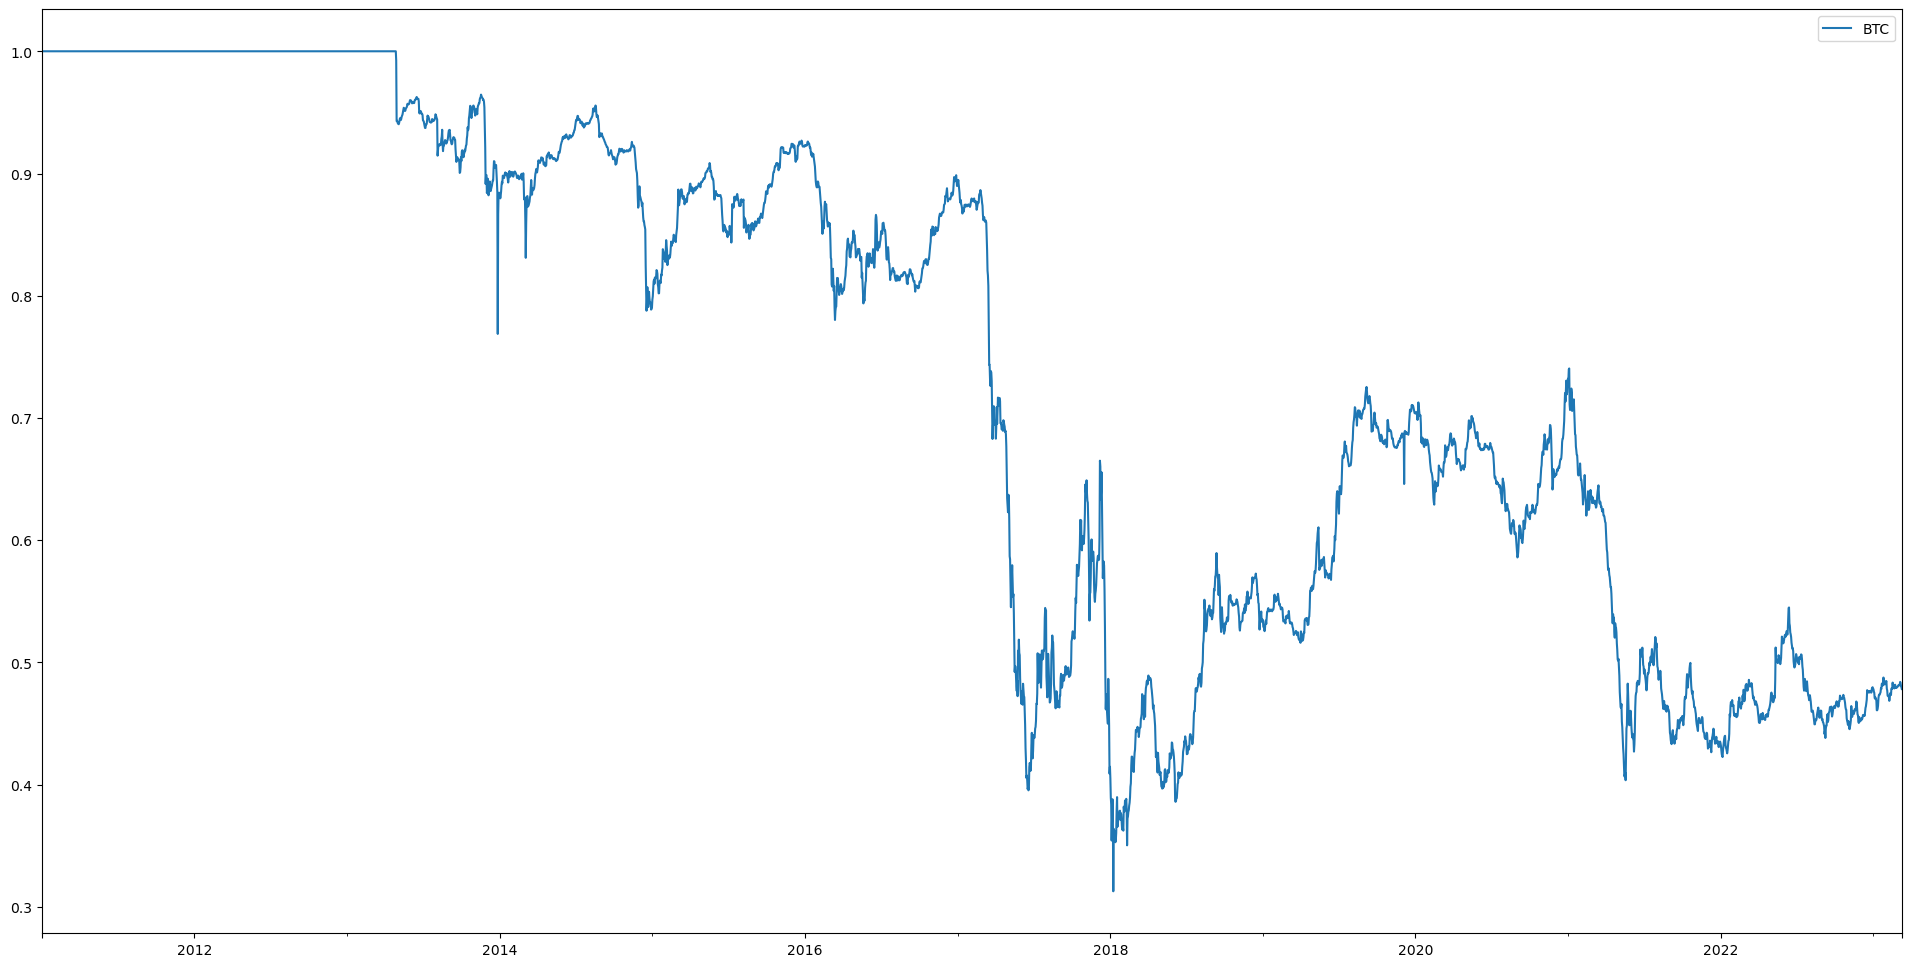

In [79]:
weight[["BTC"]].plot(figsize=(24,12));

In [80]:
btc = weight[["BTC"]]

btc.pct_change().loc[(btc.pct_change().abs()> 0.1).values]

,BTC
2013-12-27,-0.130630
2013-12-28,0.127232
2017-12-07,0.103678
2018-01-08,-0.155031
2018-01-09,0.163195


2013년 12월 27일-28일 check

In [81]:
rtn.loc["2013-12-27"].sort_values(ascending=False).iloc[:10]

WDC     0.158914
QRK     0.121015
XRP     0.101861
FTC     0.067888
IXC     0.050948
ZET     0.044080
ANC     0.041494
TRC     0.030594
OMNI    0.026170
BTC     0.026013
Name: 2013-12-27 00:00:00, dtype: float64

In [82]:
mktcap.loc["2013-12-26":"2013-12-27",["WDC","QRK","XRP"]]

,WDC,QRK,XRP
2013-12-26,16286233.0,2.557910e+07,181829688.0
2013-12-27,90490051.0,8.679525e+09,833165941.0


XRP : mktcap을 price기반으로 클리닝

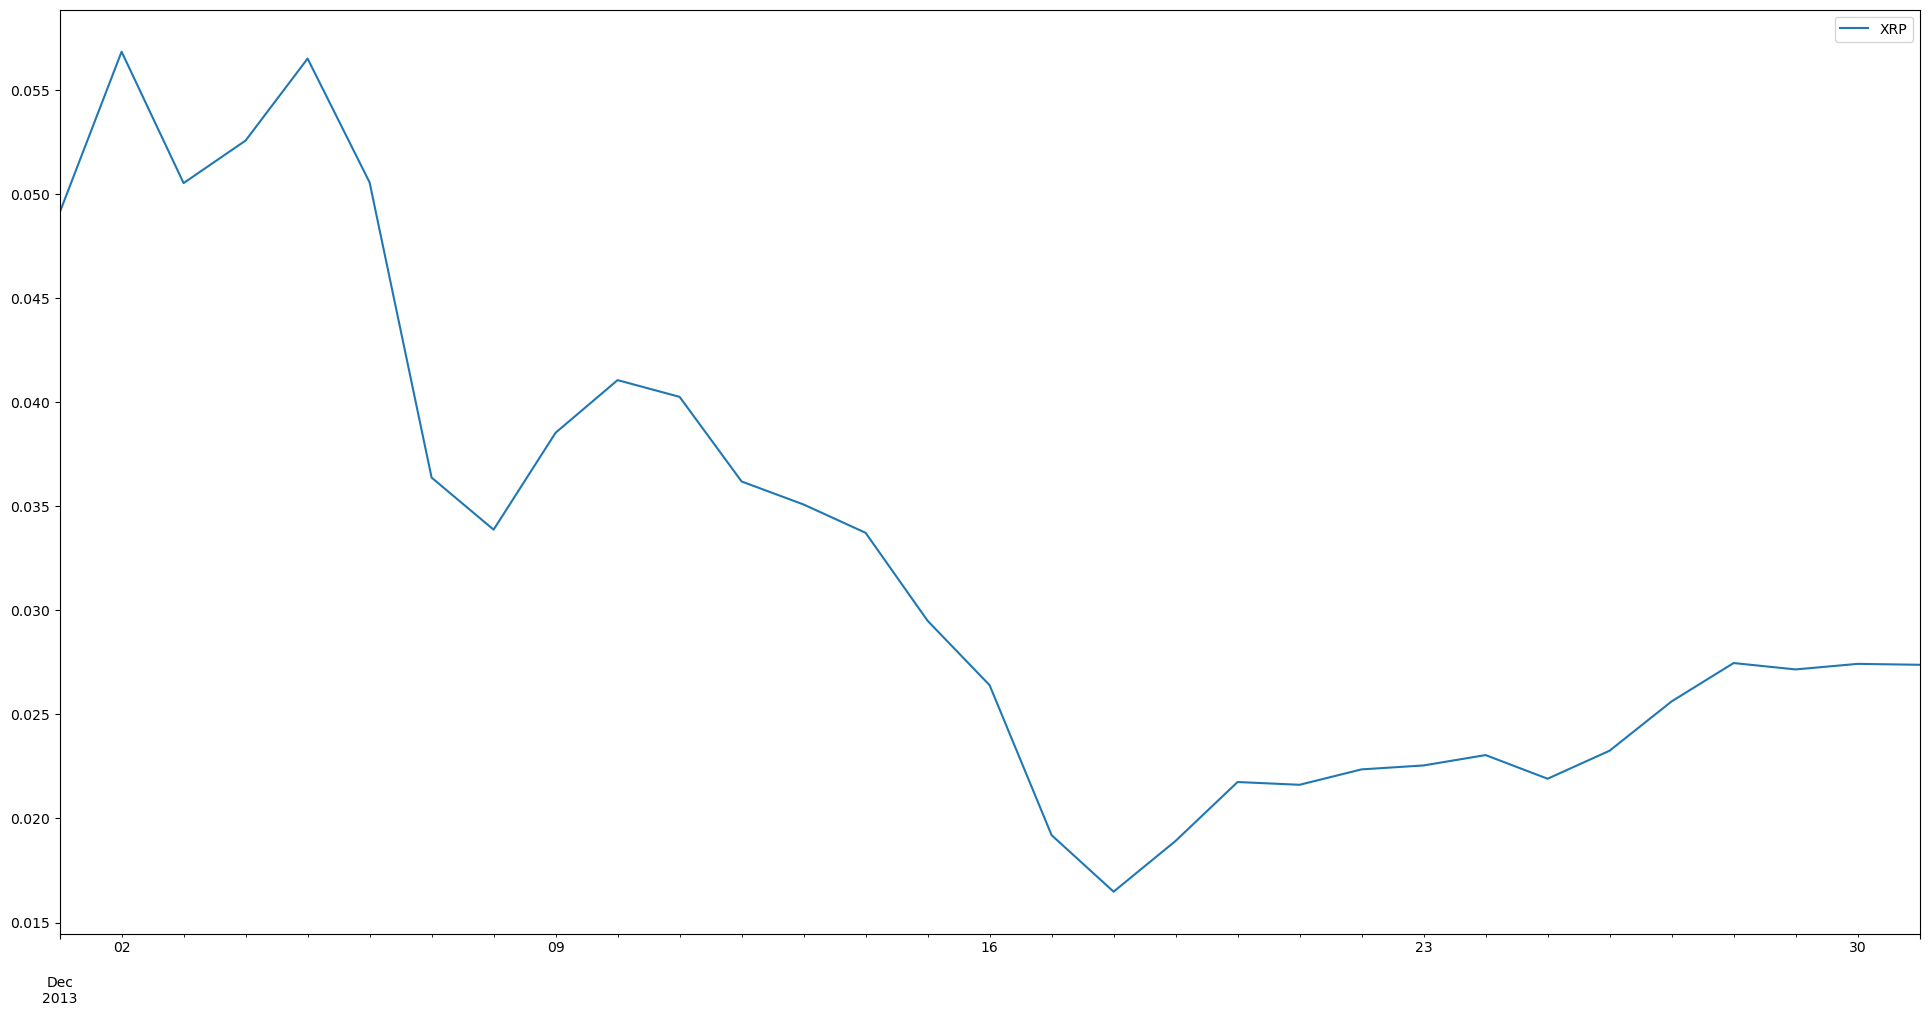

In [83]:
price[["XRP"]].loc["2013-12"].plot(figsize=(24,12));

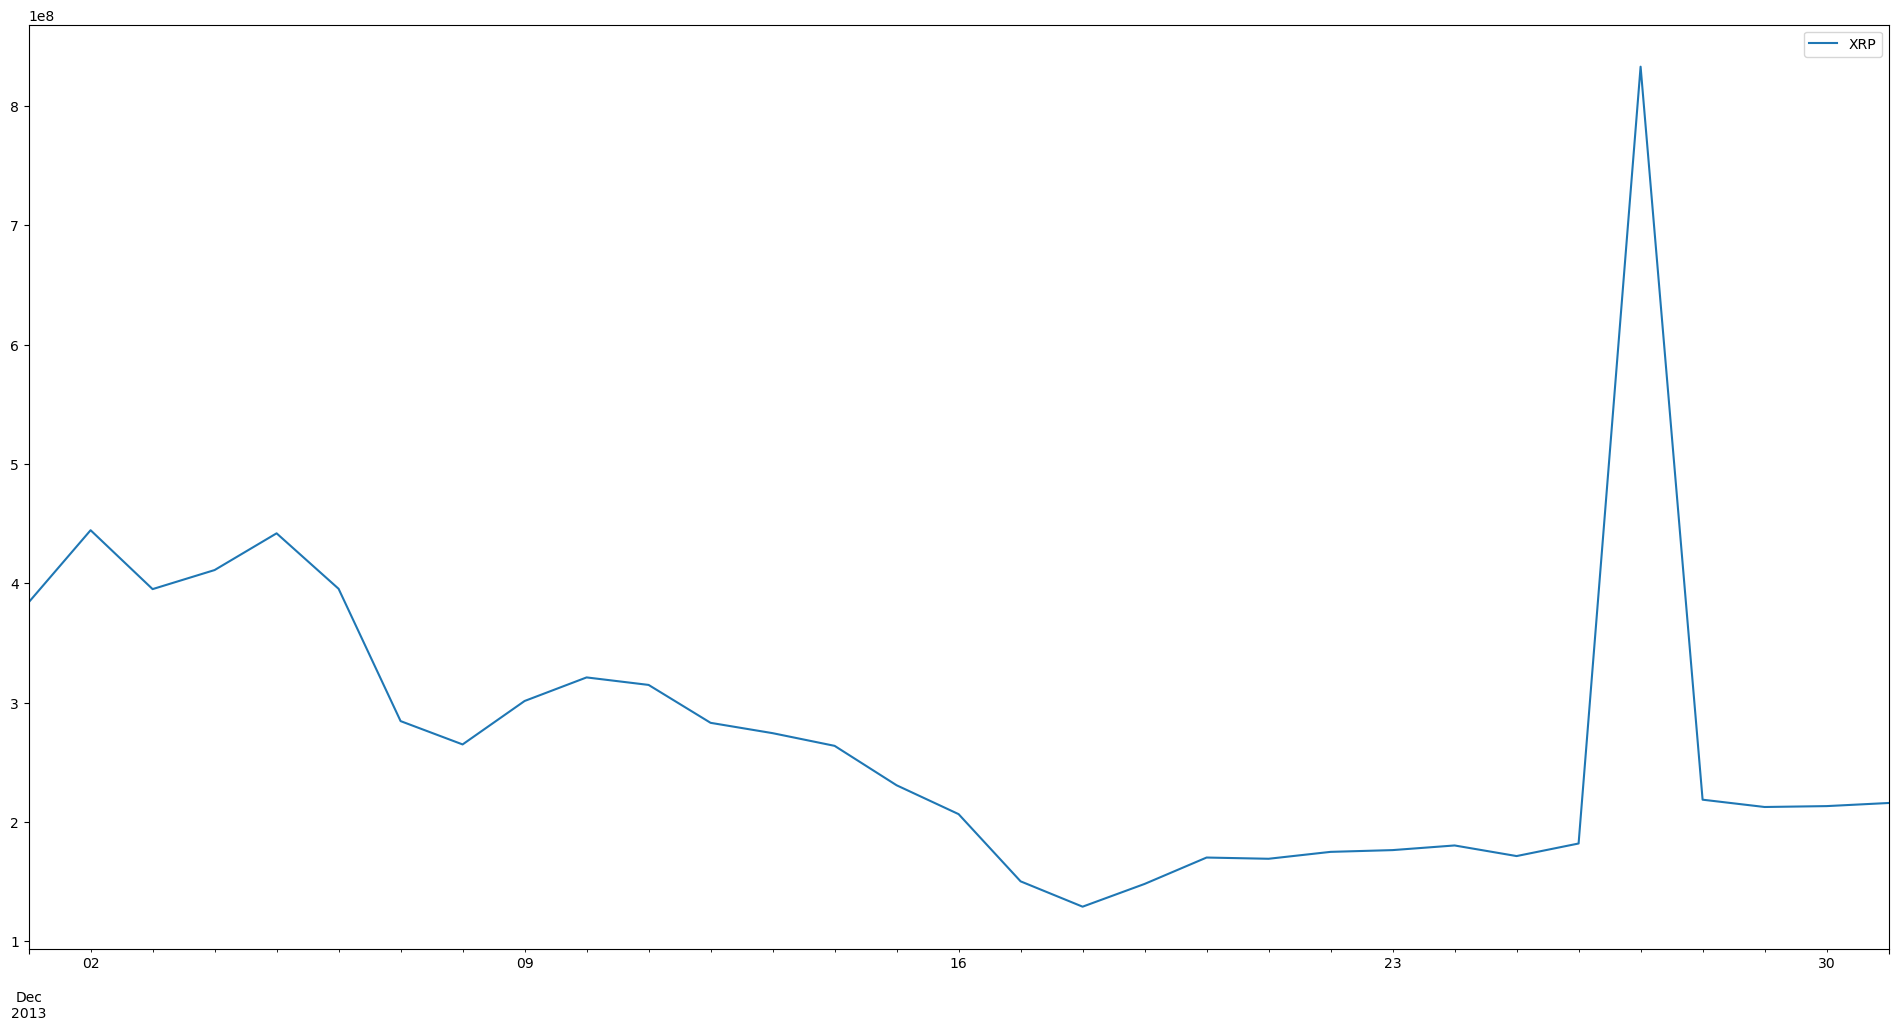

In [84]:
mktcap[["XRP"]].loc["2013-12"].plot(figsize=(24,12));

In [85]:
coin = "XRP"
t_0 = "2013-12-26"
t_1 = "2013-12-27" # 수정할 날

coin_rtn = rtn[[coin]].loc[t_1].values[0]

# 클리닝 이전 값
mktcap[["XRP"]].loc[t_0:t_1]

,XRP
2013-12-26,181829688.0
2013-12-27,833165941.0


In [86]:
# 클리닝
mktcap[coin].loc[t_1] = mktcap[coin].loc[t_0]*(1 + rtn.loc[t_1, coin])

# 클리닝 이후
mktcap[["XRP"]].loc[t_0:t_1]

,XRP
2013-12-26,1.818297e+08
2013-12-27,2.003511e+08


WDC

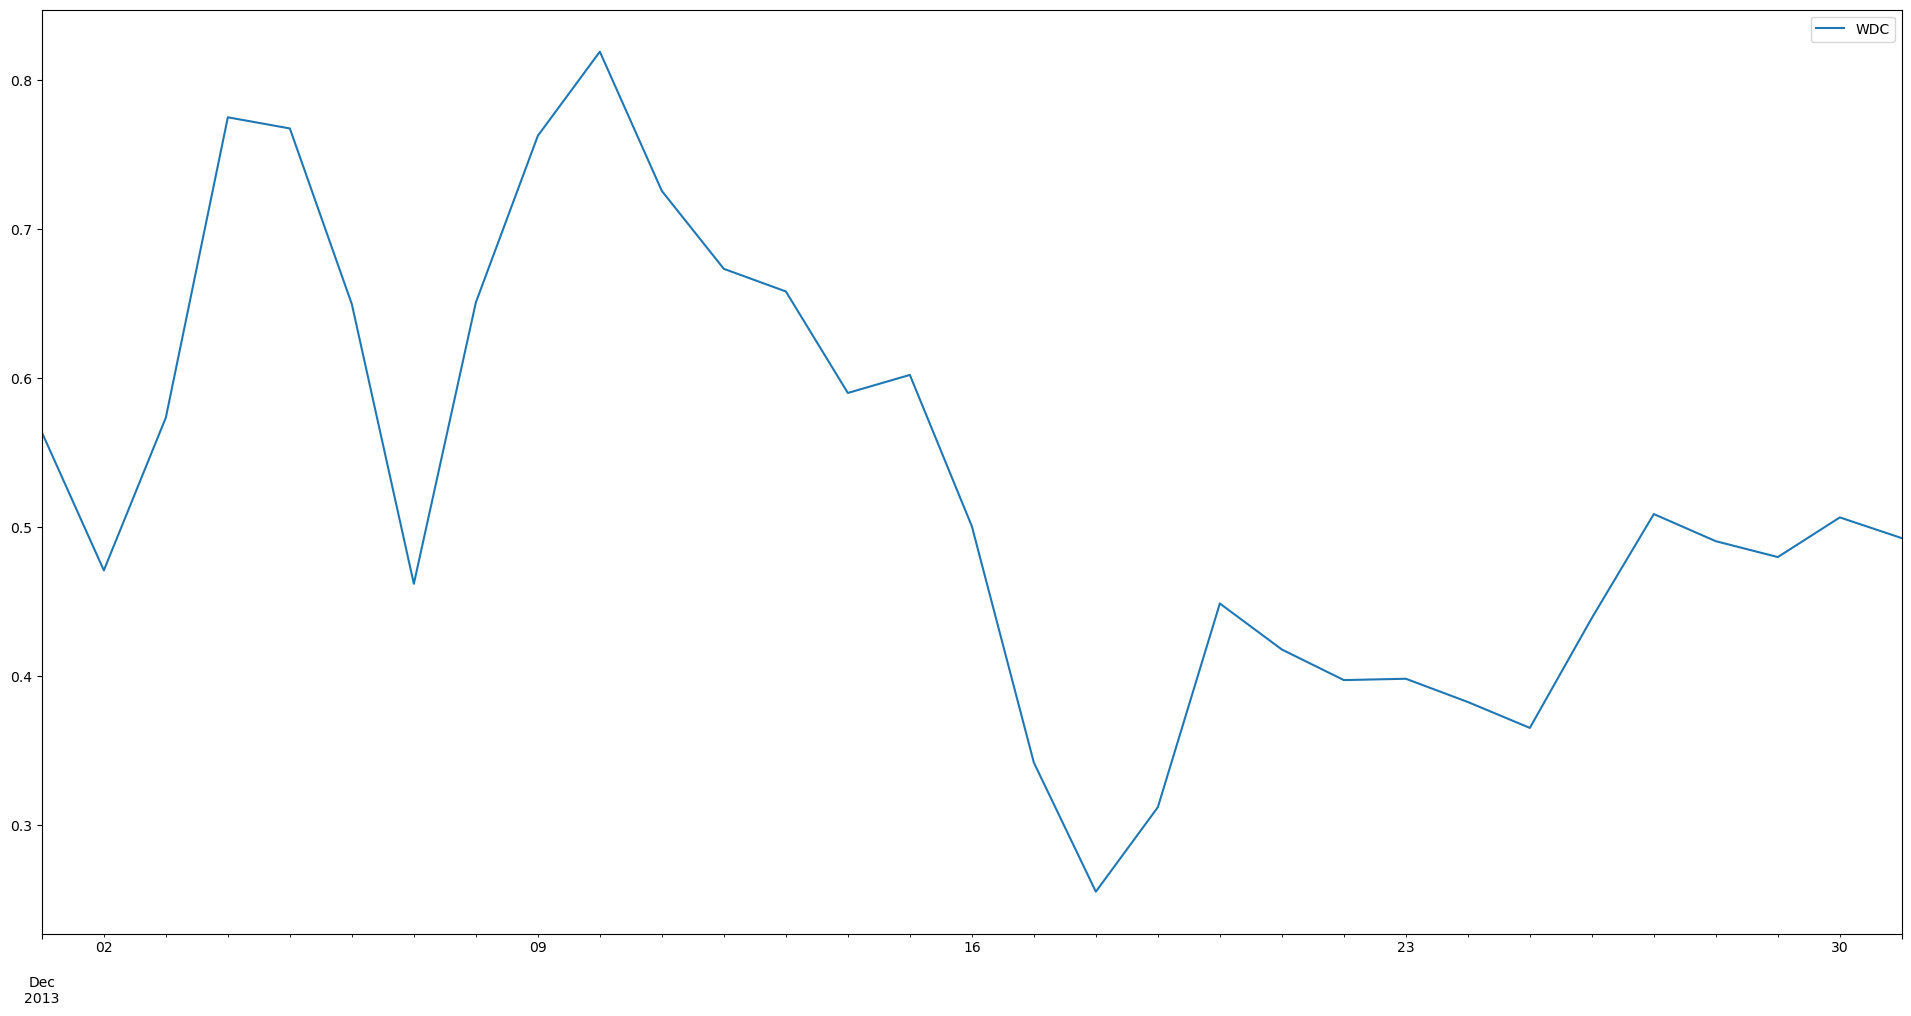

In [87]:
price[["WDC"]].loc["2013-12"].plot(figsize=(24,12));

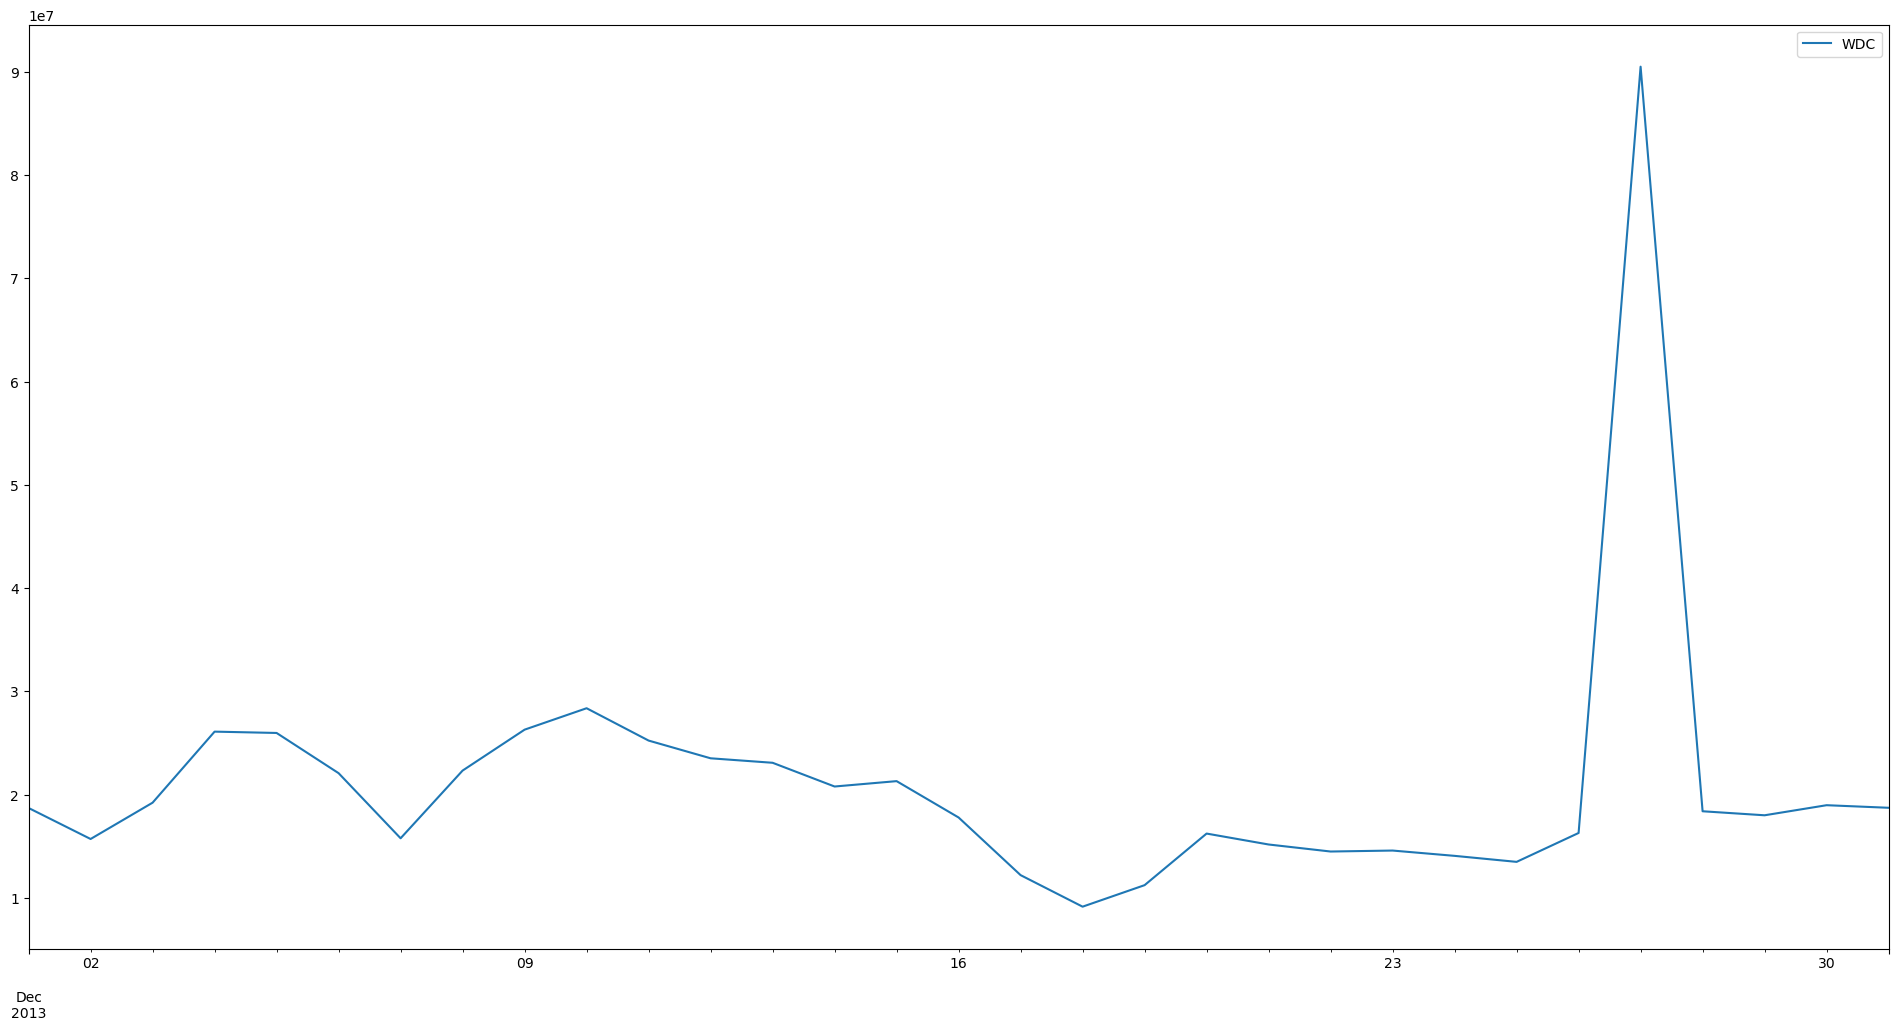

In [88]:
mktcap[["WDC"]].loc["2013-12"].plot(figsize=(24,12));

In [89]:
coin = "WDC"
t_0 = "2013-12-26"
t_1 = "2013-12-27" # 수정할 날

coin_rtn = rtn[[coin]].loc[t_1].values[0]

# 클리닝 이전 값
mktcap[[coin]].loc[t_0:t_1]

,WDC
2013-12-26,16286233.0
2013-12-27,90490051.0


In [90]:
# 클리닝
mktcap[coin].loc[t_1] = mktcap[coin].loc[t_0]*(1 + rtn.loc[t_1, coin])

# 클리닝 이후
mktcap[[coin]].loc[t_0:t_1]

,WDC
2013-12-26,1.628623e+07
2013-12-27,1.887434e+07


QRK 클리닝

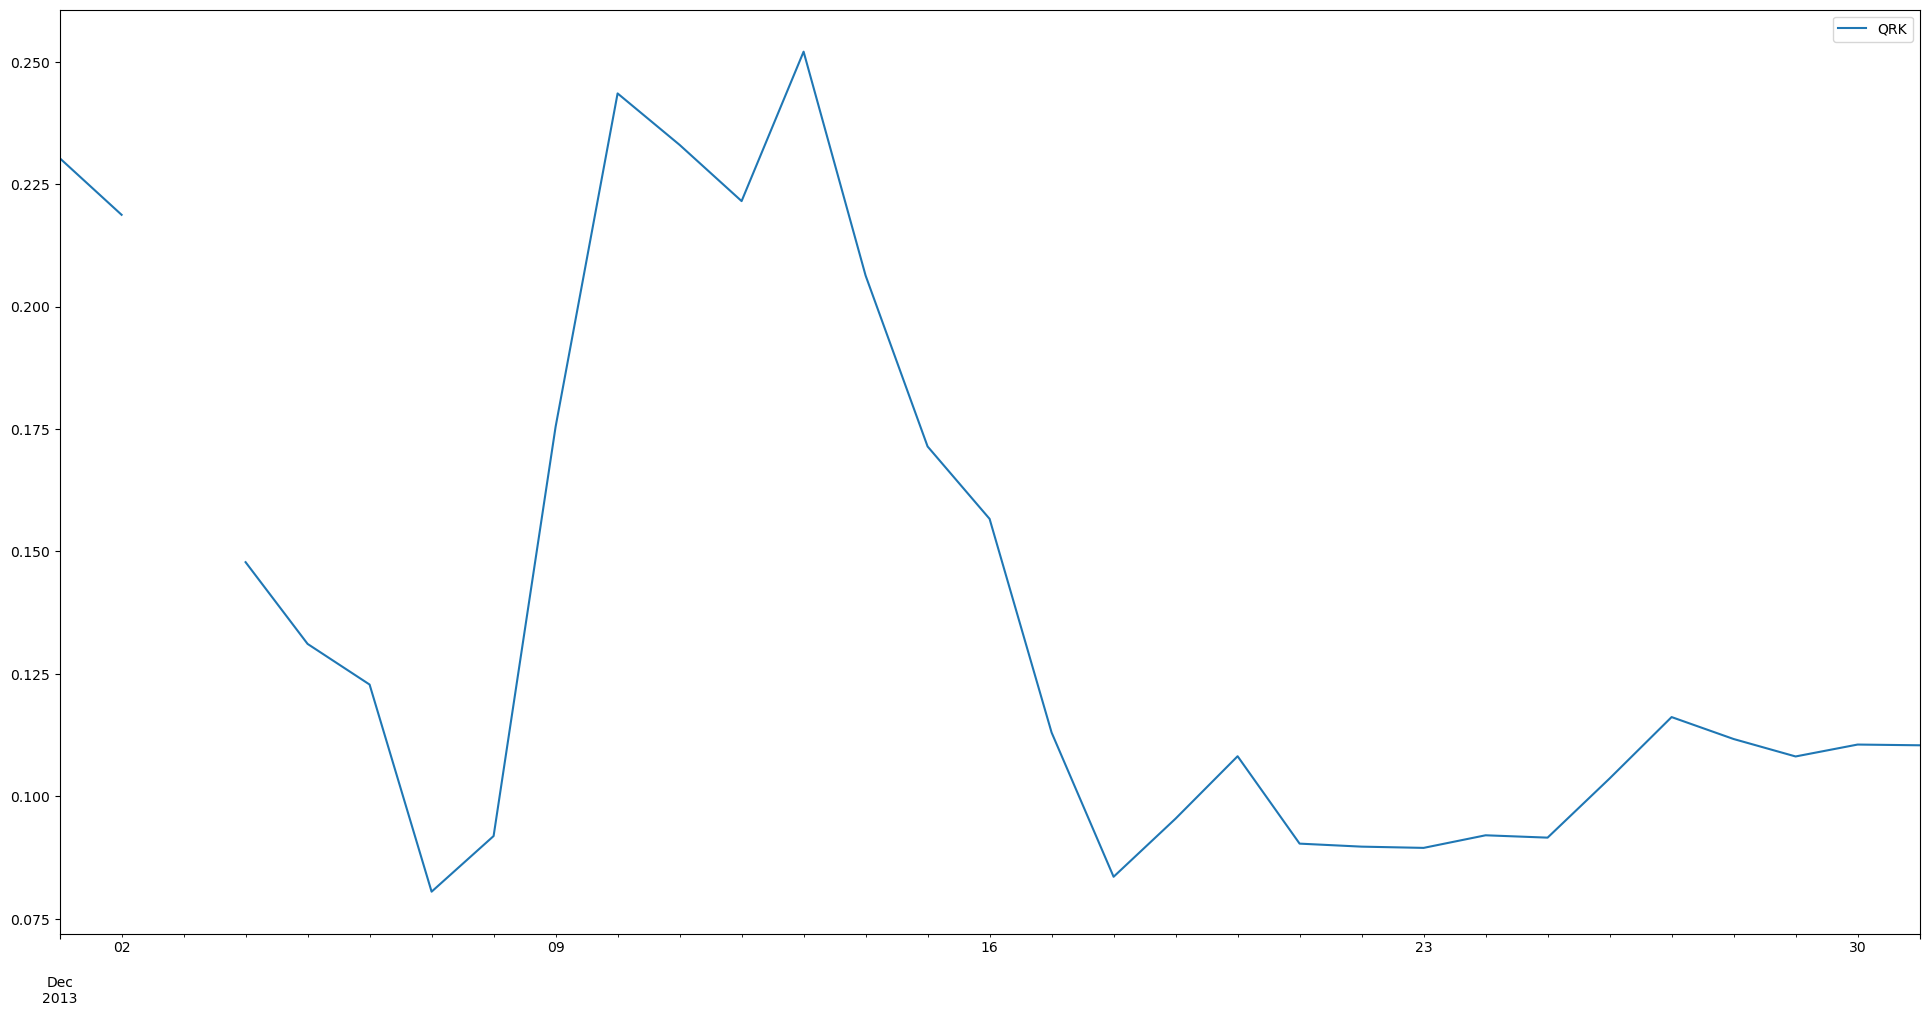

In [91]:
price[["QRK"]].loc["2013-12"].plot(figsize=(24,12));

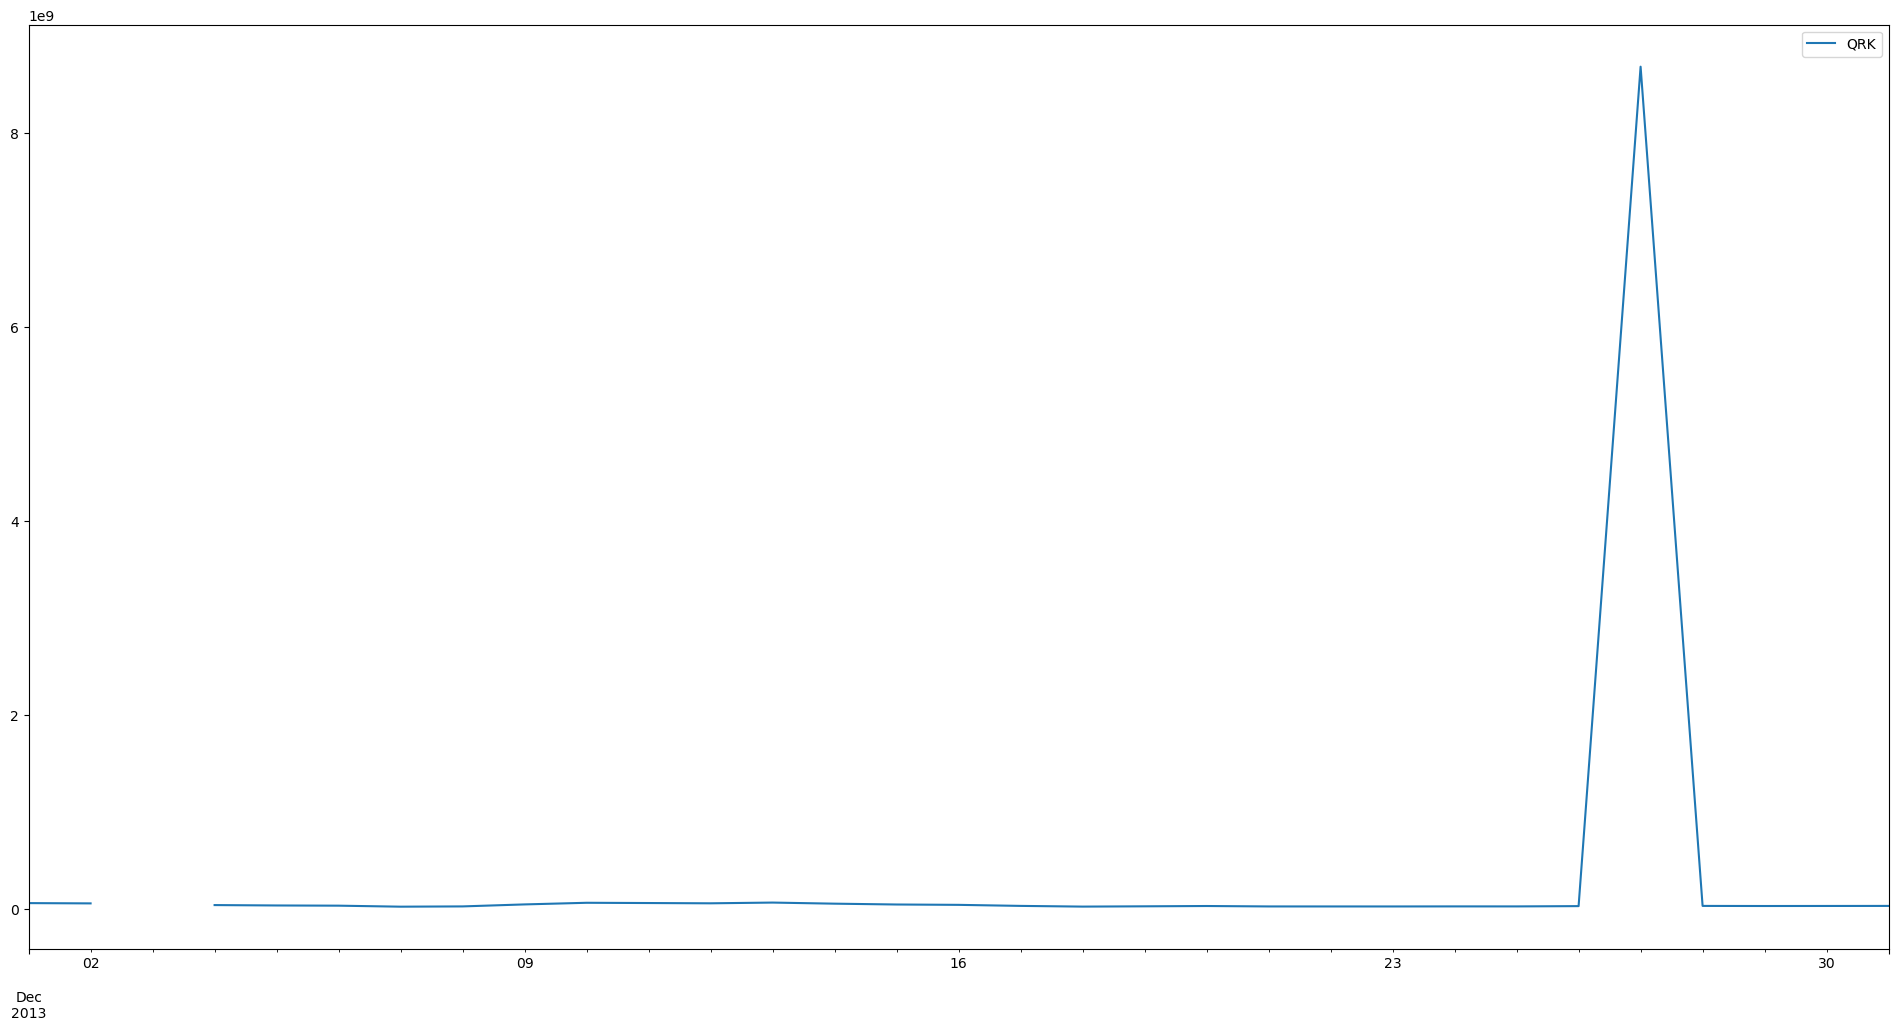

In [92]:
mktcap[["QRK"]].loc["2013-12"].plot(figsize=(24,12));

In [93]:
coin = "QRK"
t_0 = "2013-12-26"
t_1 = "2013-12-27" # 수정할 날

coin_rtn = rtn[[coin]].loc[t_1].values[0]

# 클리닝 이전 값
mktcap[[coin]].loc[t_0:t_1]

,QRK
2013-12-26,2.557910e+07
2013-12-27,8.679525e+09


In [94]:
# 클리닝
mktcap[coin].loc[t_1] = mktcap[coin].loc[t_0]*(1 + rtn.loc[t_1, coin])

# 클리닝 이후
mktcap[[coin]].loc[t_0:t_1]

,QRK
2013-12-26,2.557910e+07
2013-12-27,2.867457e+07


In [95]:
# 2013년 12월 27일 클리닝 완료

2018년 1월 8일 클리닝 진행

In [96]:
rtn.loc["2018-01-09"].sort_values(ascending=False).iloc[:10]

FYP     1.217585
MED     0.789792
MYST    0.787234
COLX    0.713350
XCXT    0.681512
ODN     0.613518
DNA     0.579173
MCRN    0.578414
ADC     0.560252
LRC     0.550267
Name: 2018-01-09 00:00:00, dtype: float64

In [100]:
# 음 크게 이상한 값은 없는 것 같군...
mktcap.loc["2018-01-08":"2018-01-09",["FYP","MED","MYST","COLX","XCXT","ODN","DNA","MCRN","ADC","LRC","BTC"]]

,FYP,MED,MYST,COLX,XCXT,ODN,DNA,MCRN,ADC,LRC,BTC
2018-01-08,14739198.0,255685144.0,45776474.0,81801599.0,NaN,30337026.0,48691411.0,13324239.0,10165564.0,70833294.0,2.634095e+11
2018-01-09,31835549.0,530760125.0,94776326.0,120151454.0,4675900.0,48186712.0,65788030.0,1122306.0,16455782.0,109164770.0,2.535143e+11


In [113]:
# 그렇다면 weight가 많이 변하는 애들을 찾아보자
weight_pct = weight.pct_change(fill_method=None)
s = weight_pct.loc["2018-01-08":"2018-01-09"]

s.sort_values(by="2018-01-08", axis=1, 
              ascending=False)
# KCS 점검 해야겠군

,KCS,NOBL,SMC,ARC,DNA,SIGT,DCY,HTC,NEBL,UNIFY,...,ZYX,ZZC,ZZZ,ZZZV2,eCum,eRSDL,g9tro,imBTC,yBXTB,yTOFU
2018-01-08,24.224893,1.072468,0.905363,0.877984,0.683019,0.650209,0.613049,0.551668,0.475909,0.466662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,-0.950193,0.837711,0.063163,0.228036,0.632961,-0.214564,0.212887,1.367142,0.767249,0.209712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
s.sort_values(by="2018-01-09", axis=1, 
              ascending=False)
#IFLT 점검해봐야겠군 -> coinmarketcap에 없어서 드랍하면 될듯

,IFLT,FYP,MED,MYST,WDC,HTC,NTRN,ELE,ADZ,LINX,...,ZYX,ZZC,ZZZ,ZZZV2,eCum,eRSDL,g9tro,imBTC,yBXTB,yTOFU
2018-01-08,-0.635289,0.040876,-0.168000,0.054583,-0.740394,0.551668,-0.435346,-0.300909,0.207322,-0.085887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,4.210080,1.610476,1.508846,1.502297,1.497950,1.367142,1.318232,1.232875,1.051130,0.979703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


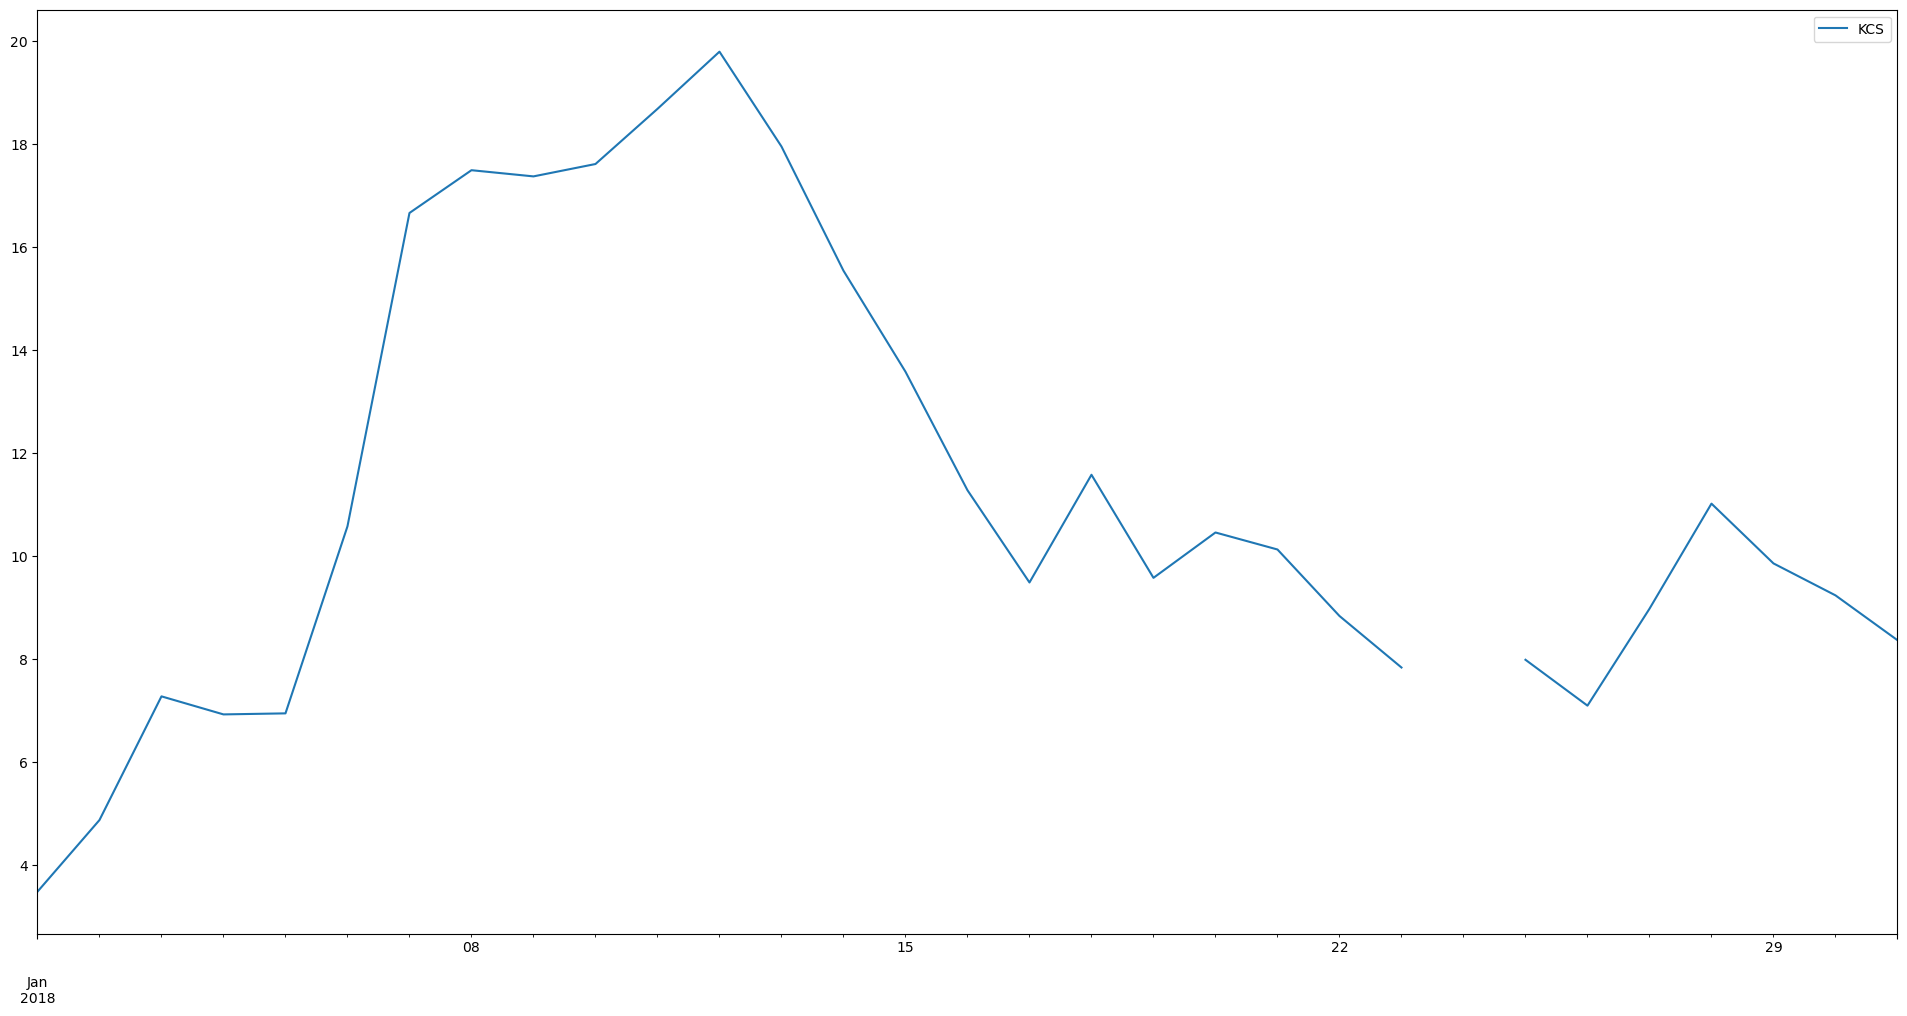

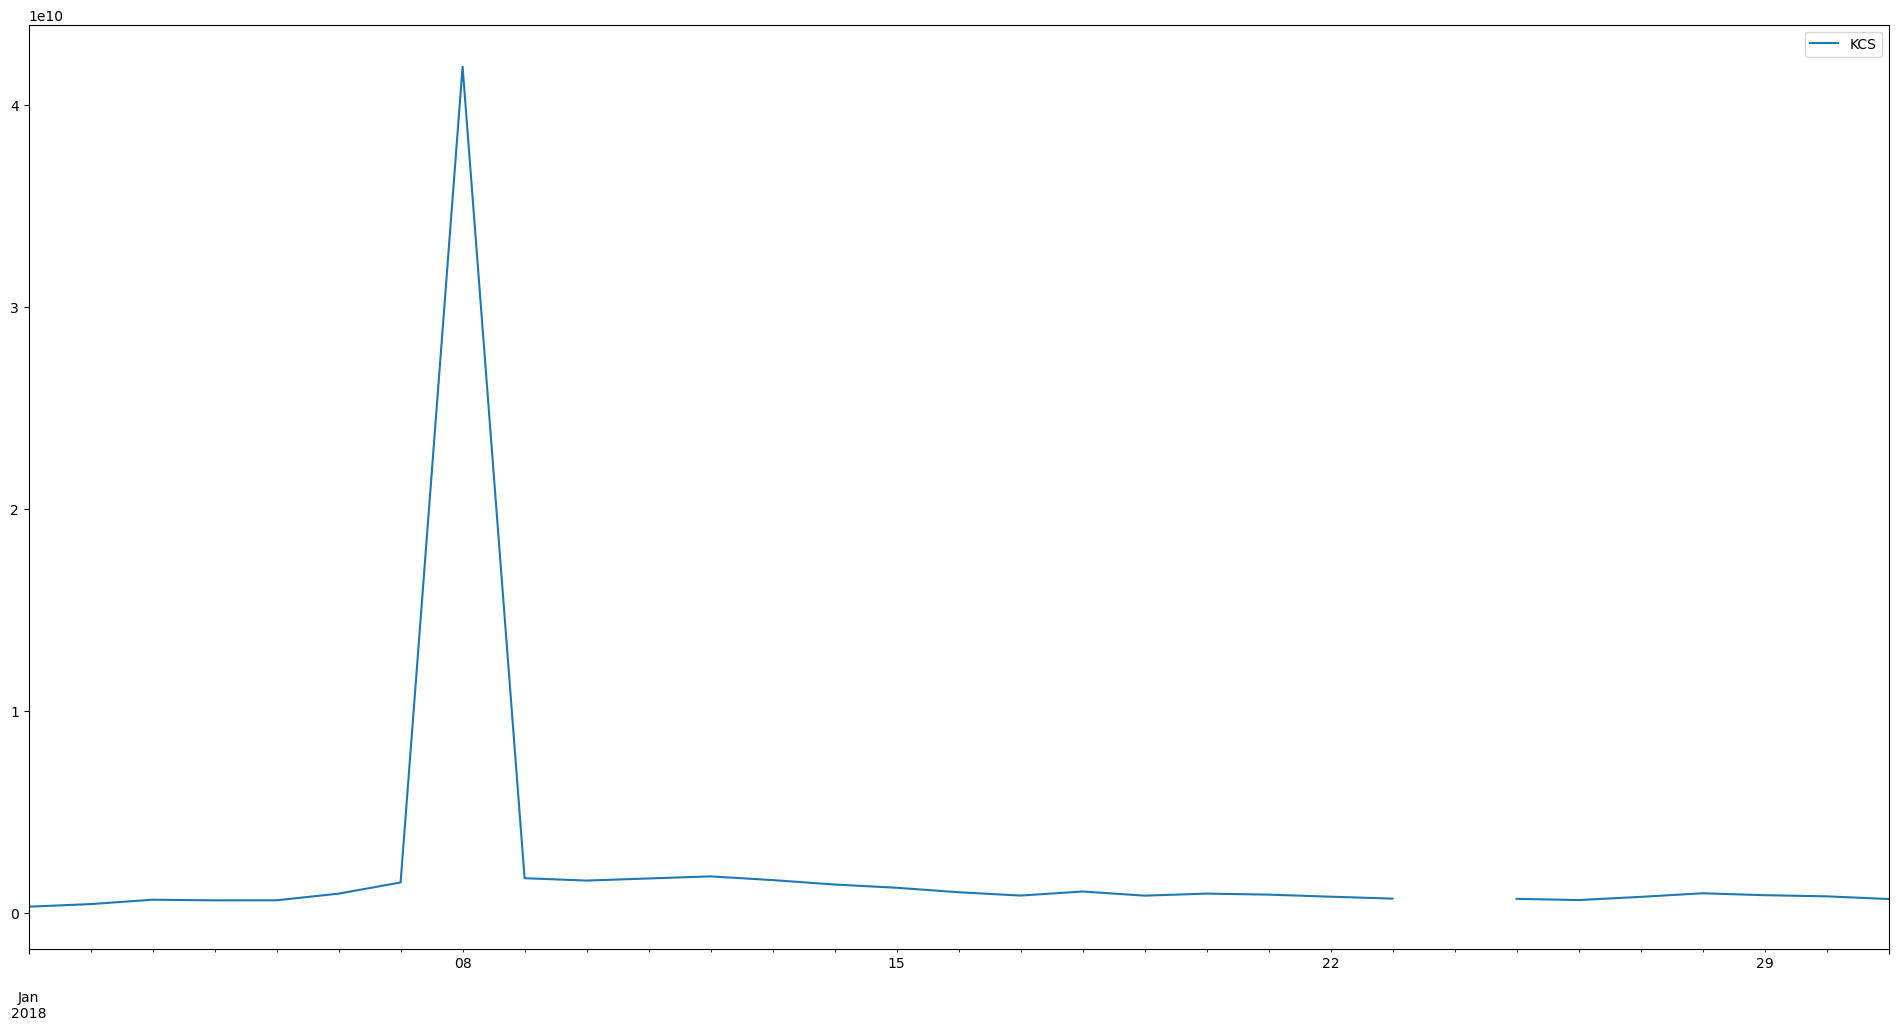

In [121]:
# check KCS -> Needs market cleaning
coin = "KCS"
t_0 = "2018-01-07"
t_1 = "2018-01-08" # 수정할 날

price[[coin]].loc["2018-01"].plot(figsize=(24,12))
mktcap[[coin]].loc["2018-01"].plot(figsize=(24,12));

In [122]:
coin_rtn = rtn[[coin]].loc[t_1].values[0]

# 클리닝 이전 값
mktcap[[coin]].loc[t_0:t_1]

,KCS
2018-01-07,1.517151e+09
2018-01-08,4.191220e+10


In [123]:
# 클리닝
mktcap[coin].loc[t_1] = mktcap[coin].loc[t_0]*(1 + rtn.loc[t_1, coin])

# 클리닝 이후
mktcap[[coin]].loc[t_0:t_1]

,KCS
2018-01-07,1.517151e+09
2018-01-08,1.592735e+09


IFLT 드랍

In [124]:
clean_mktcap = mktcap.drop("IFLT", axis=1)
clean_price = price.drop("IFLT", axis=1)
clean_vol = vol.drop("IFLT", axis=1)

In [125]:
# Save
clean_mktcap.to_pickle("ryu_new_mktcap8.pickle")
clean_price.to_pickle("ryu_new_price8.pickle")
clean_vol.to_pickle("ryu_new_volume8.pickle")

<AxesSubplot:>

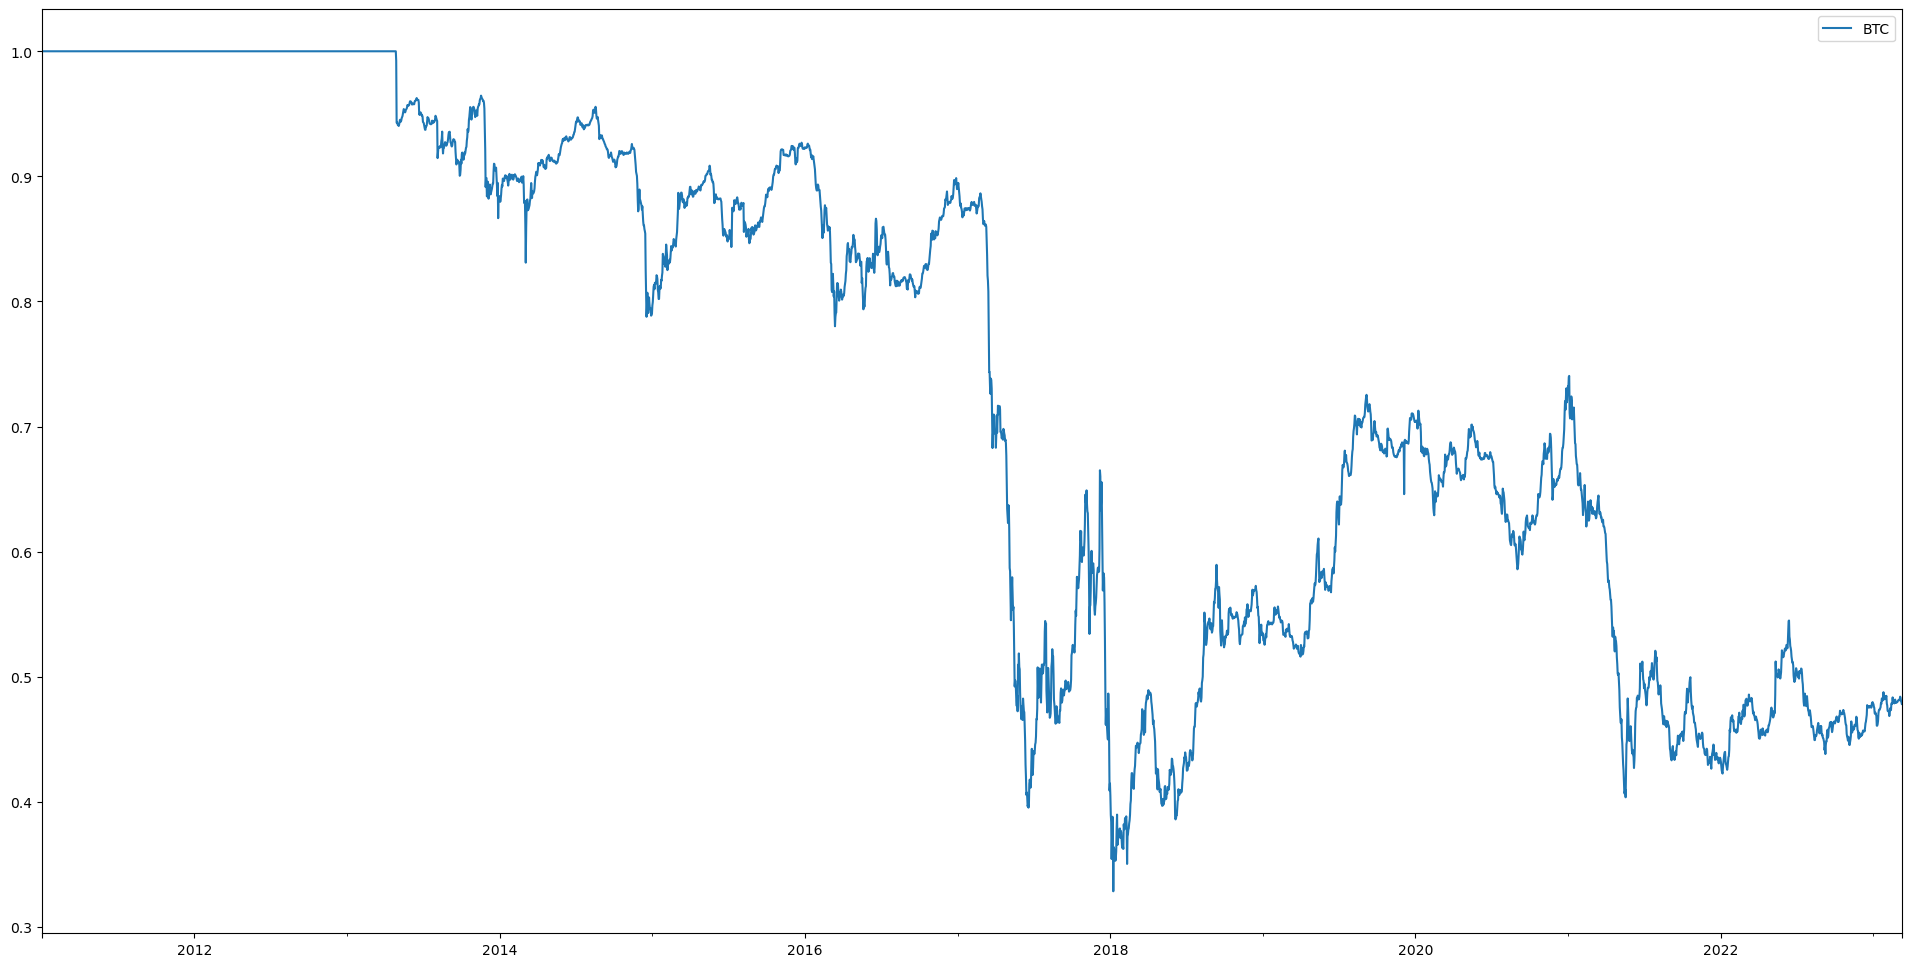

In [128]:
clean_mktcap.apply(lambda x: x/np.nansum(x), axis=1)[["BTC"]].plot(figsize=(24,12))

3)	BCZERO, BLOCK2, CSM3 드랍

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
mktcap = pd.read_pickle("ryu_new_mktcap8.pickle")
price = pd.read_pickle("ryu_new_price8.pickle")
vol = pd.read_pickle("ryu_new_volume8.pickle")

#weight = mktcap.apply(lambda x: x/ np.nansum(x), axis=1)
#rtn = price.pct_change(fill_method=None) * np.sign(price)

In [3]:
drop_col = ["BCZERO","BLOCK2","CSM3"]
mktcap2 = mktcap.drop(drop_col, axis=1)
price2 = price.drop(drop_col, axis=1)
vol2 = vol.drop(drop_col, axis=1)

In [4]:
# Save
mktcap2.to_pickle("ryu_new_mktcap9.pickle")
price2.to_pickle("ryu_new_price9.pickle")
vol2.to_pickle("ryu_new_volume9.pickle")

In [22]:
vol_mask = np.sign(vol2).replace(0,1)

In [5]:
weight = mktcap2.apply(lambda x: x/ np.nansum(x), axis=1)
rtn = price2.pct_change(fill_method=None) * np.sign(price2)

<AxesSubplot:>

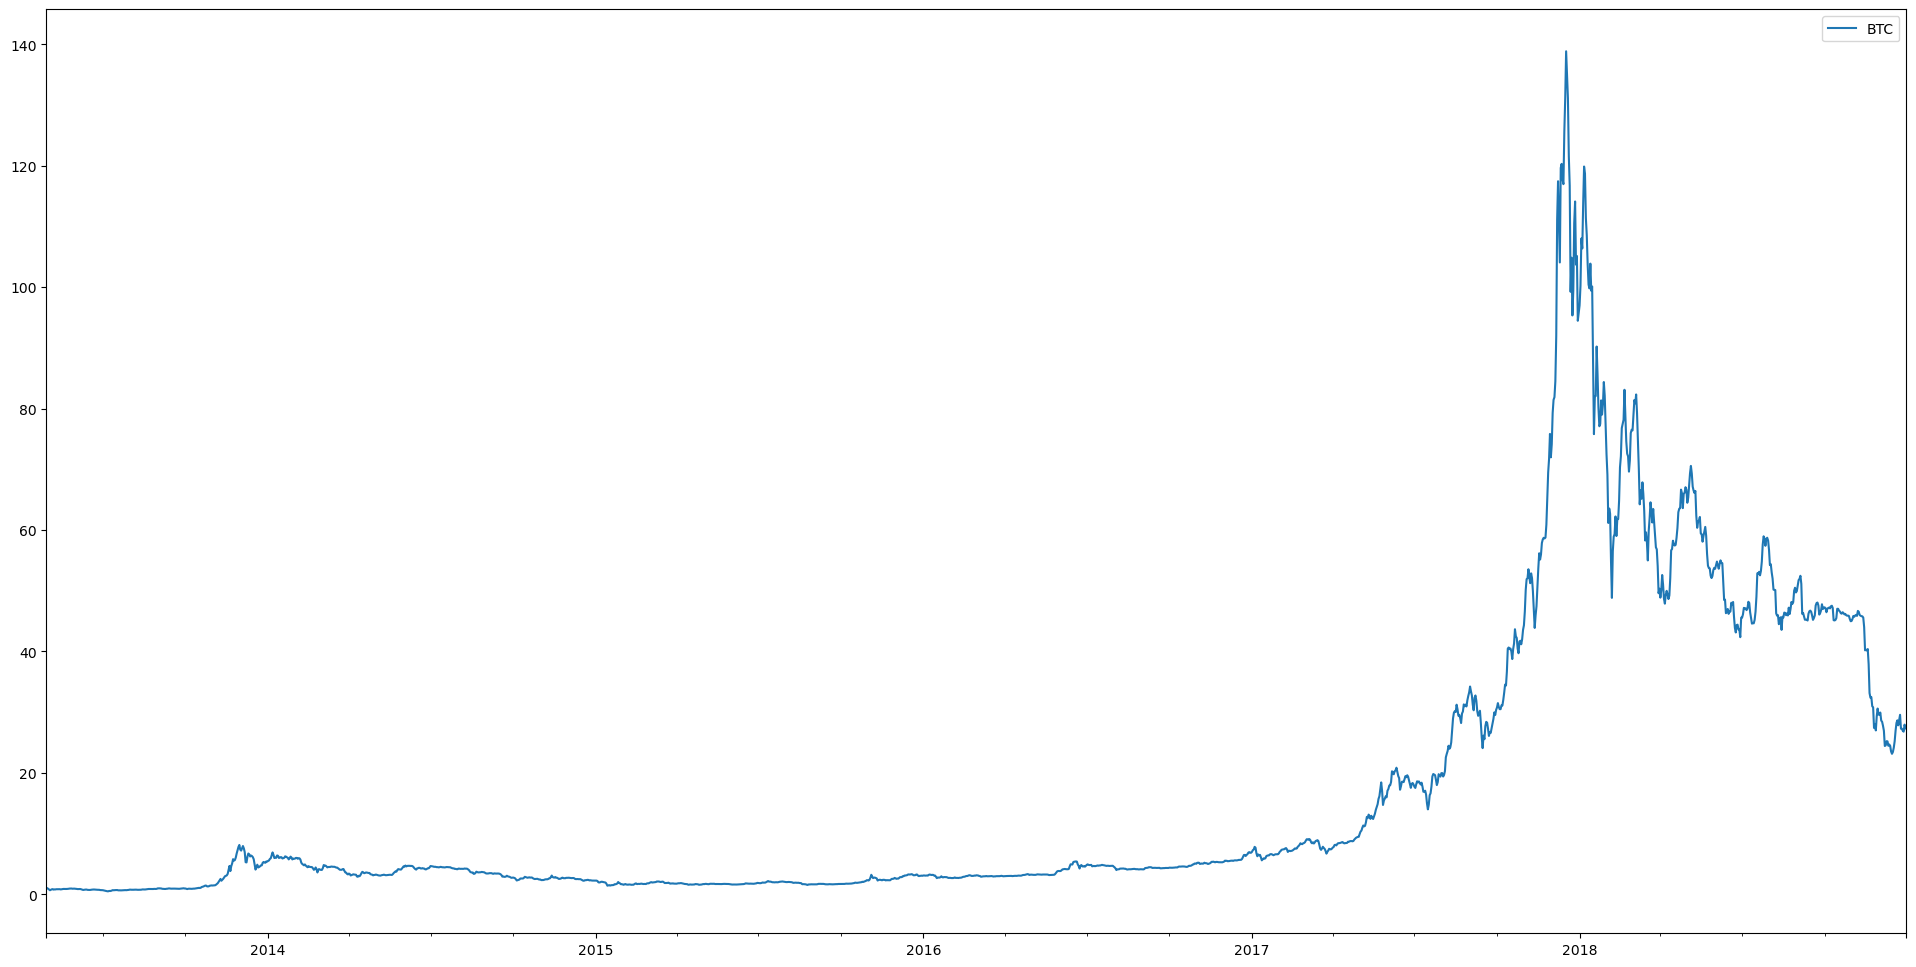

In [14]:
(price2[["BTC"]].loc["2013-04-29":"2018"] / price2.loc["2013-04-29",["BTC"]]).plot(figsize=(24,12))

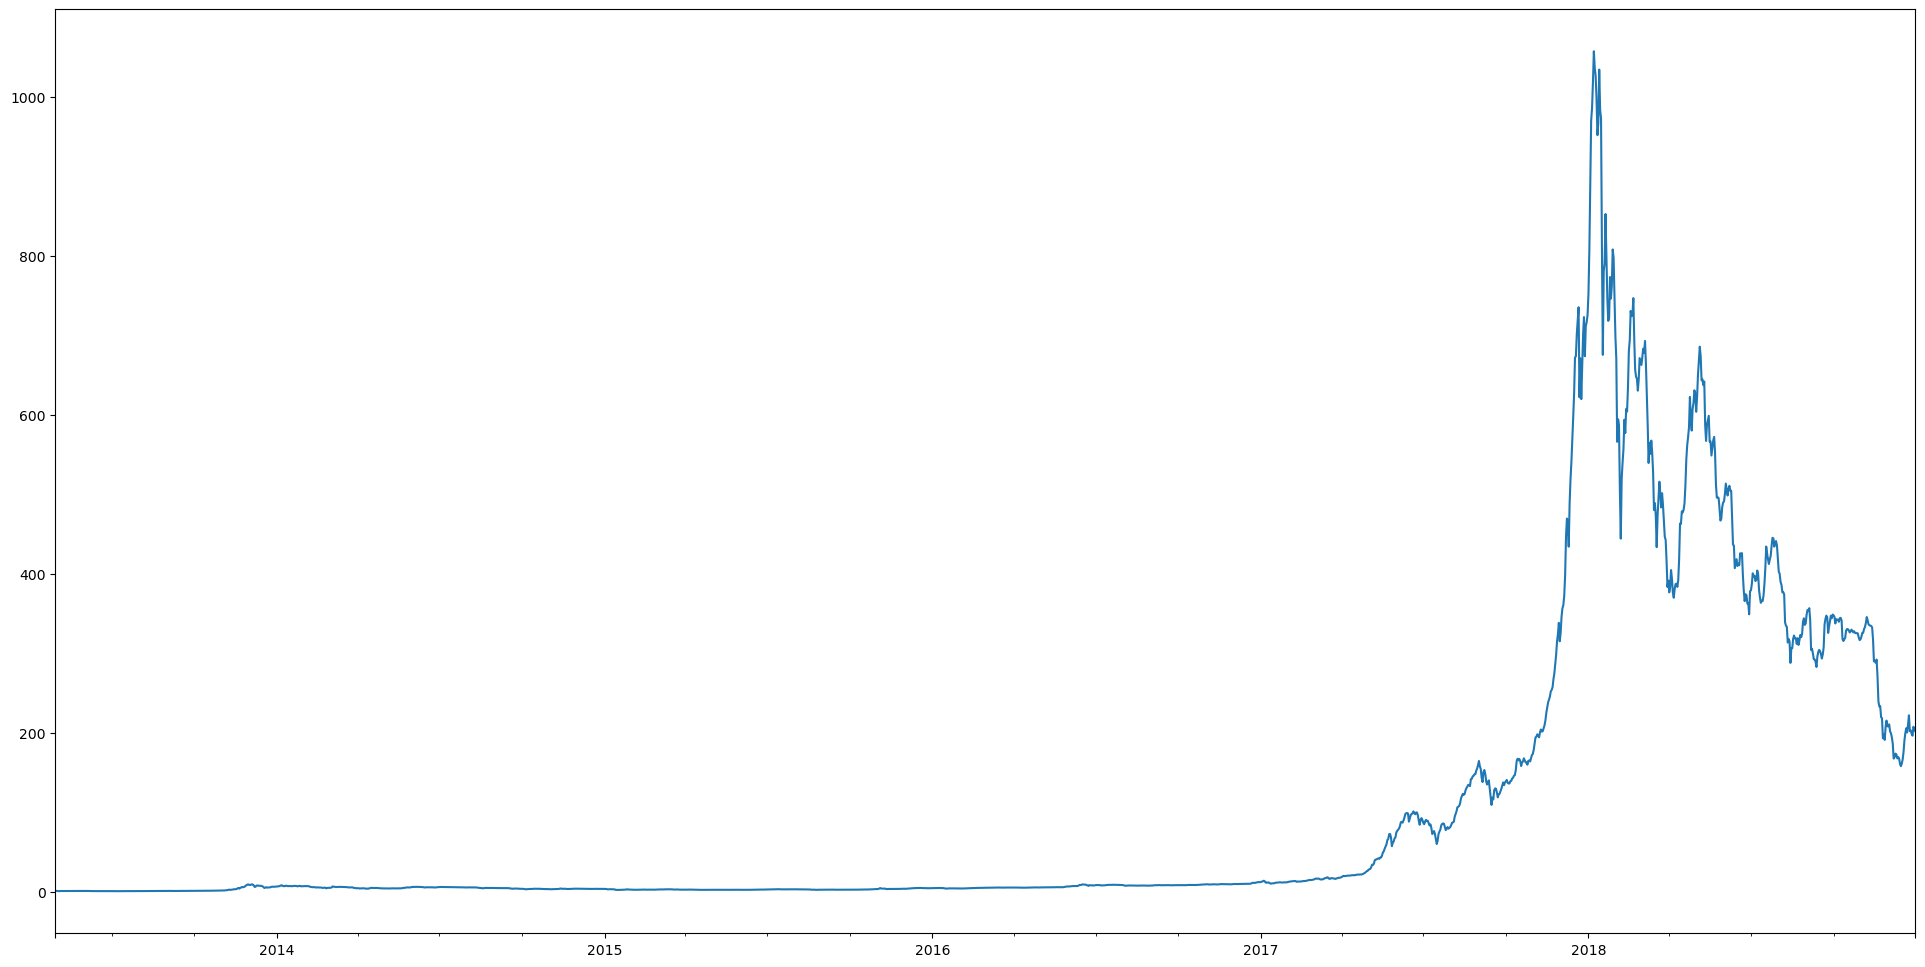

In [23]:
((vol_mask * weight * rtn).sum(1) + 1).loc["2013-04-29":"2018"].cumprod().plot(figsize=(24,12));